# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create lists
city_name = []
lat = []
lon = []
high = []
humid = []
cloud = []
wind = []
country = []
time = []

cty_ct = 1

url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial'
print("Beggining Data Retrieval")
print("------------------------")
for place in cities:
    try:        
        response = requests.get(f"{url}&q={place}&APPID={weather_api_key}").json() 
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        high.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        time.append(response['dt'])
        print(f"Processing Record {cty_ct} of set 1 | {place}")
        cty_ct = cty_ct + 1
    except:
        print(f"City not found! Skipping...")      

Beggining Data Retrieval
------------------------
Processing Record 1 of set 1 | rikitea
Processing Record 2 of set 1 | longyearbyen
Processing Record 3 of set 1 | saint-philippe
Processing Record 4 of set 1 | codrington
Processing Record 5 of set 1 | kununurra
Processing Record 6 of set 1 | biak
Processing Record 7 of set 1 | mahenge
Processing Record 8 of set 1 | ponta do sol
Processing Record 9 of set 1 | bluff
Processing Record 10 of set 1 | ushuaia
Processing Record 11 of set 1 | upernavik
Processing Record 12 of set 1 | hoquiam
Processing Record 13 of set 1 | khatanga
Processing Record 14 of set 1 | albany
Processing Record 15 of set 1 | rosario
Processing Record 16 of set 1 | vaini
Processing Record 17 of set 1 | hithadhoo
City not found! Skipping...
City not found! Skipping...
Processing Record 18 of set 1 | salym
Processing Record 19 of set 1 | goderich
Processing Record 20 of set 1 | hermanus
City not found! Skipping...
Processing Record 21 of set 1 | kalianget
Processing Rec

Processing Record 186 of set 1 | port hardy
Processing Record 187 of set 1 | encarnacion
Processing Record 188 of set 1 | port blair
Processing Record 189 of set 1 | kyzyl-suu
Processing Record 190 of set 1 | novoseleznevo
Processing Record 191 of set 1 | port-gentil
Processing Record 192 of set 1 | horsham
Processing Record 193 of set 1 | fortuna
Processing Record 194 of set 1 | saint george
Processing Record 195 of set 1 | lubbock
Processing Record 196 of set 1 | akyab
Processing Record 197 of set 1 | koroni
Processing Record 198 of set 1 | agadez
Processing Record 199 of set 1 | saurimo
Processing Record 200 of set 1 | makakilo city
Processing Record 201 of set 1 | riyadh
Processing Record 202 of set 1 | norman wells
Processing Record 203 of set 1 | yulara
Processing Record 204 of set 1 | tynne
Processing Record 205 of set 1 | orsha
Processing Record 206 of set 1 | kiama
Processing Record 207 of set 1 | mount hagen
Processing Record 208 of set 1 | hofn
Processing Record 209 of set 1

Processing Record 368 of set 1 | konyshevka
Processing Record 369 of set 1 | rio grande
City not found! Skipping...
Processing Record 370 of set 1 | iqaluit
Processing Record 371 of set 1 | faanui
Processing Record 372 of set 1 | akcakoca
Processing Record 373 of set 1 | lagoa
Processing Record 374 of set 1 | nara
Processing Record 375 of set 1 | camana
Processing Record 376 of set 1 | marinette
Processing Record 377 of set 1 | manaus
Processing Record 378 of set 1 | egvekinot
Processing Record 379 of set 1 | turukhansk
Processing Record 380 of set 1 | yuanping
Processing Record 381 of set 1 | opuwo
Processing Record 382 of set 1 | krasnoselkup
Processing Record 383 of set 1 | san jose
Processing Record 384 of set 1 | poronaysk
Processing Record 385 of set 1 | yarada
Processing Record 386 of set 1 | ous
Processing Record 387 of set 1 | itarema
Processing Record 388 of set 1 | haines junction
City not found! Skipping...
Processing Record 389 of set 1 | broome
Processing Record 390 of se

Processing Record 553 of set 1 | margate
Processing Record 554 of set 1 | valle hermoso
Processing Record 555 of set 1 | looc
Processing Record 556 of set 1 | mandalgovi
Processing Record 557 of set 1 | halifax
City not found! Skipping...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictonary with the lists generated
weather_dict = {
    "City": city_name,
    "Lat":lat, 
    "Lng":lon,
    "Max Temp": high,
    "Humidity": humid,
    "Cloudiness":cloud,
    "Wind Speed":wind,     
    "Country":country,
    "Date":time}

# Create a data frame from dictionary
weather_df = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather_df.count()
        

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Save to CSV
weather_df.to_csv('Output_data/weather.csv')

# Display data 
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,81.72,71,12,6.49,PF,1615770951
1,Longyearbyen,78.2186,15.6401,-0.40,71,20,10.36,SJ,1615770911
2,Saint-Philippe,-21.3585,55.7679,77.00,78,75,5.75,RE,1615770951
3,Codrington,-38.2667,141.9667,66.83,62,87,9.35,AU,1615770952
4,Kununurra,-15.7667,128.7333,77.00,100,100,6.91,AU,1615770952


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
for h in weather_df["Humidity"]:
    if h > 100:
        print("At least 1 city has humidity greater than 100%")
        break
    else:
        print("No cities have hunidity above 100%")
        break

No cities have hunidity above 100%


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

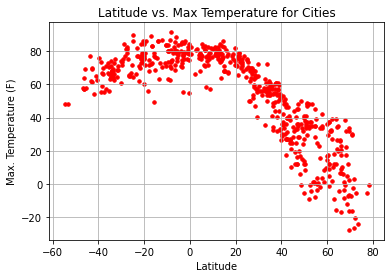

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=12, color='red')

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature for Cities")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

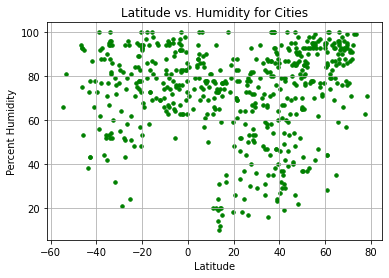

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=12, color='green')

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity for Cities")
plt.ylabel("Percent Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humid_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

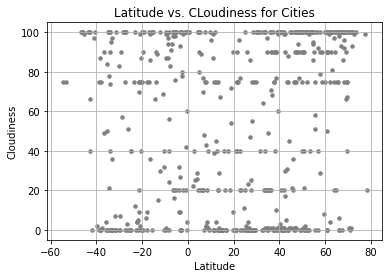

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=12, color='gray')

# Incorporate the other graph properties
plt.title("Latitude vs. CLoudiness for Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloud_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

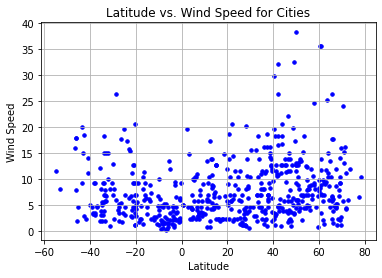

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=12, color='blue')

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed for Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [13]:
#Seperate by north and southern 
north = weather_df.loc[weather_df["Lat"] >= 0.0]
#north
south = weather_df.loc[weather_df["Lat"] < 0.0]
#south

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

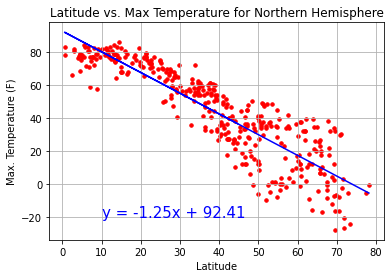

The r-squared is: 0.7879934931226636


In [14]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Max Temp"])
reg = north["Lat"]*slope+intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north["Lat"],north["Max Temp"], marker="o", s=12, color='red')
plt.plot(north["Lat"],reg,"b-")
plt.annotate(line,(10,-20),fontsize=15,color="blue")
plt.title("Latitude vs. Max Temperature for Northern Hemisphere")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_temp_north.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

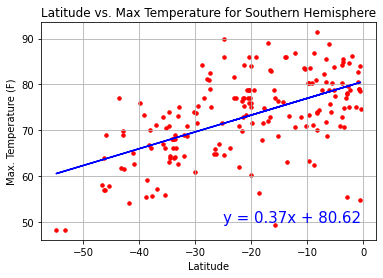

The r-squared is: 0.31476928826793993


In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Max Temp"])
reg = south["Lat"]*slope+intercept
a_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south["Lat"],south["Max Temp"], marker="o", s=12, color='red')
plt.plot(south["Lat"],reg,"b-")
plt.annotate(a_line,(-25,50),fontsize=15,color="blue")
plt.title("Latitude vs. Max Temperature for Southern Hemisphere")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_temp_south.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

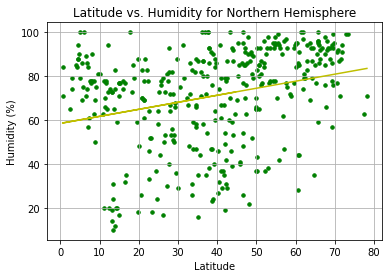

The r-squared is: 0.07971406096419599


In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Humidity"])
reg = north["Lat"]*slope+intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north["Lat"],north["Humidity"], marker="o", s=12, color='green')
plt.plot(north["Lat"],reg,"y-")
plt.annotate(line,(45,5),fontsize=15,color="orange")
plt.title("Latitude vs. Humidity for Northern Hemisphere")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_humid_north.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

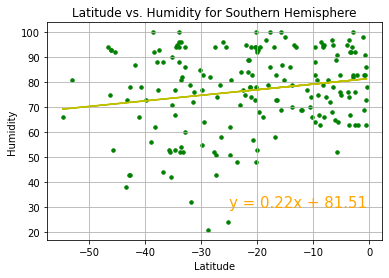

The r-squared is: 0.03402752813828088


In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Humidity"])
reg = south["Lat"]*slope+intercept
a_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south["Lat"],south["Humidity"], marker="o", s=12, color='green')
plt.plot(south["Lat"],reg,"y-")
plt.annotate(a_line,(-25,30),fontsize=15,color="orange")
plt.title("Latitude vs. Humidity for Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_humid_south.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

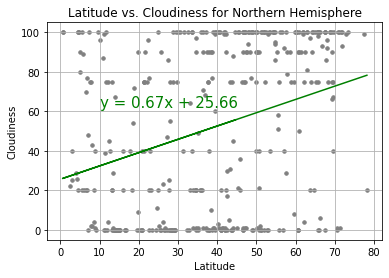

The r-squared is: 0.09895759212899063


In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Cloudiness"])
reg = north["Lat"]*slope+intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north["Lat"],north["Cloudiness"], marker="o", s=12, color='gray')
plt.plot(north["Lat"],reg,"g-")
plt.annotate(line,(10,62),fontsize=15,color="green")
plt.title("Latitude vs. Cloudiness for Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_cloud_north.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

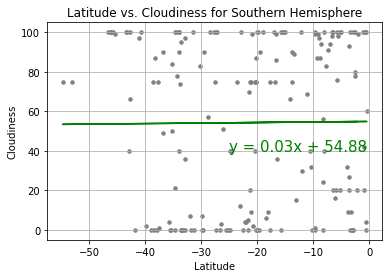

The r-squared is: 7.868359274942529e-05


In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Cloudiness"])
reg = south["Lat"]*slope+intercept
a_line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south["Lat"],south["Cloudiness"], marker="o", s=12, color='gray')
plt.plot(south["Lat"],reg,"g-")
plt.annotate(a_line,(-25,40),fontsize=15,color="green")
plt.title("Latitude vs. Cloudiness for Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_cloud_south.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

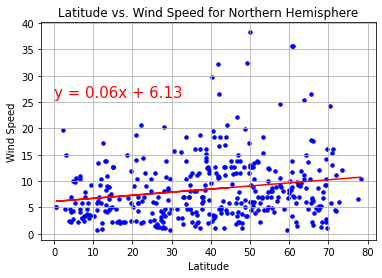

The r-squared is: 0.03652823981543845


In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Wind Speed"])
reg = north["Lat"]*slope+intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north["Lat"],north["Wind Speed"], marker="o", s=12, color='blue')
plt.plot(north["Lat"],reg,"r-")
plt.annotate(line,(0,26),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed for Northern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_wind_north.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

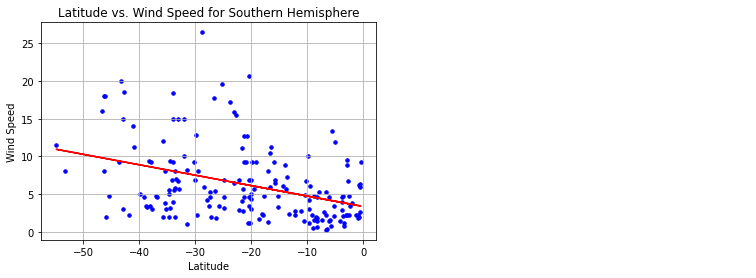

The r-squared is: 0.1501378924096044


In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Wind Speed"])
reg = south["Lat"]*slope+intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south["Lat"],south["Wind Speed"], marker="o", s=12, color='blue')
plt.plot(south["Lat"],reg,"r-")
plt.annotate(line,(45,5),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed for Southern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Output_Plots/regression_wind_south.png", bbox_inches = "tight")
plt.show()
print(f"The r-squared is: {rvalue**2}")